In [45]:

import os 
from pathlib import Path, PurePath, PosixPath
from dotenv import load_dotenv, find_dotenv

import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
from skimage.transform import resize
from matplotlib import pyplot as plt
import cv2

import sys 
from pathlib import Path
from dotenv import load_dotenv, find_dotenv

basepath = Path(os.getcwd())
# make sure your working directory is the repository root.
if basepath.name != "idp-radio-1":
    os.chdir(basepath.parent.parent.parent)
load_dotenv(find_dotenv())


from src.preprocessing.cropping.template_matching import TemplateMatcher

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# Load labels
DATASET_FOLDER = Path(os.environ.get('CHEXPERT_DEV_DATASET_DIRECTORY'))
data = pd.read_csv(DATASET_FOLDER / 'train.csv', index_col=[0])
data = data.fillna(0.0)
data = data

In [47]:
imagepath = data['Path'].iloc[45]
imagepath

'CheXpert-v1.0-small/train/patient00165/study2/view1_frontal.jpg'

(270, 270)

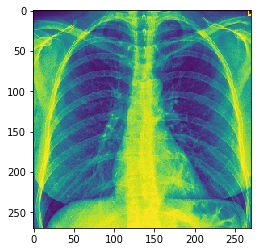

In [68]:
img = cv2.imread(str(DATASET_FOLDER / imagepath), 0)
img = img[30:300, 30:300]
plt.imshow(img)
template = img.copy()
img.shape


<Figure size 648x936 with 0 Axes>

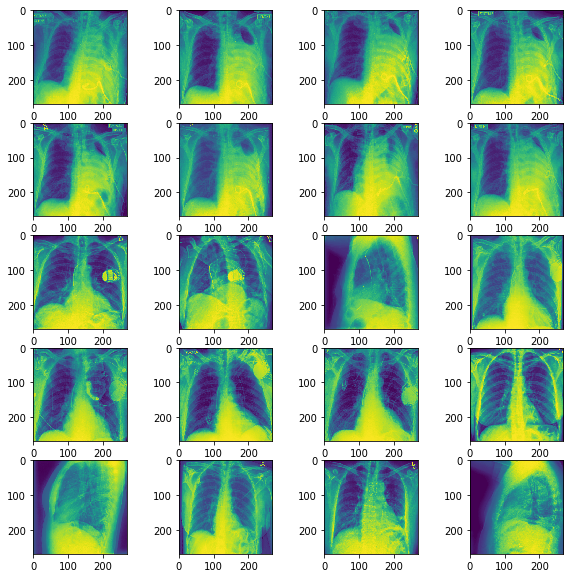

In [67]:
import math


w = 10
h = 10
fig = plt.figure(figsize=(9, 13))
columns = 4
rows = 5

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

matcher = TemplateMatcher(size=(270,270))
fig=plt.figure(figsize=(10, 10))
for i in range(30,50):
    img = cv2.imread(str(DATASET_FOLDER / data['Path'].iloc[i]), 0)
    # resize image to 300,300 before cropping
    img = cv2.resize(img, dsize=(300,300))
    # crop image to 270,270
    res = matcher.match(img)
    ax.append(fig.add_subplot(rows, columns, i-30+1) )
    plt.imshow(res)

plt.show()